In [2]:
%matplotlib notebook
import os
import numpy as np
import sys
import pickle
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm import tqdm
from Levenshtein import distance

In [3]:
def consensus_prob_visual(probs):
    alphabet = ['A', 'C', 'G', 'T']
    if min(probs.shape) == 5:
        alphabet.append('-')
    plt.figure(figsize=(12, 4))
    sns.heatmap(probs.T, cmap="viridis", cbar=True,  # xticklabels=False, 
                yticklabels=alphabet)
    plt.xlabel("Token index")
    plt.ylabel("Vocabulary index")
    plt.title("Probability distribution heatmap")
    plt.show()

In [4]:
def bsalign_process(seqs, file_dir, file_idx):
    bsalign_exe_path = '/home/xsh/bsalign/bsalign'
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    
    fasta_path = os.path.join(file_dir, f"{file_idx}.fasta")
    consensus_path = os.path.join(file_dir, f"{file_idx}.consensus")
    alignment_path = os.path.join(file_dir, f"{file_idx}.alignment")

    with open(fasta_path, 'w') as test_f:
        for s_id, s in enumerate(seqs):
            test_f.write(f'>{s_id}\n{s}\n')

    _ = os.system(
        f'{bsalign_exe_path} poa {fasta_path} -o {consensus_path} -L > {alignment_path}'
    )

    with open(alignment_path) as f:
        lines = f.readlines()
        msa = [
            line.strip().split(' ')[3].upper().replace('.', '-')
            for line in lines[2: 2 + len(seqs)]
        ]
        cns = lines[2 + len(seqs)].strip().split(' ')[3].upper().replace('.', '-')
        qlt = lines[3 + len(seqs)].strip().split(' ')[3]
        qlt = (np.frombuffer(qlt.encode('ascii'), dtype=np.uint8) - 33).astype(np.int64)

    os.remove(fasta_path)
    os.remove(consensus_path)
    os.remove(alignment_path)
    
    return msa, cns, qlt

In [13]:
# pickle_path = "model_bench_illumina_v2_all.pkl"
pickle_path = "/home/xsh/deep_consensus/model_bench_illumina_v2_all_second.pkl"
# pickle_path = "/home/xsh/deep_consensus/model_bench_nanopore_v2_all.pkl"
# pickle_path = '/home/xsh/deep_consensus/model_bench_illumina_v2_all.pkl'
with open(pickle_path, "rb") as f:
    pickle_dat = pickle.load(f)

Total clusters: 2410 

current_cluster_id: 0
current_depth: 5
测序序列 
 AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCCTACGTCTGCAATTGAATGCTTGCTTGCCATGTTT
AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG
AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTATACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG
AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG
AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG 

测序质量分数 
 EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAEEEEEEEEEEEEEAEEE<EEEEEAEEEEEAEEAEEAEEEEE<AEAEEAEE<AEAAAEEEAAAEAAEEE<A<EEEAE
EEEEEEEEEEEEEE

<IPython.core.display.Javascript object>


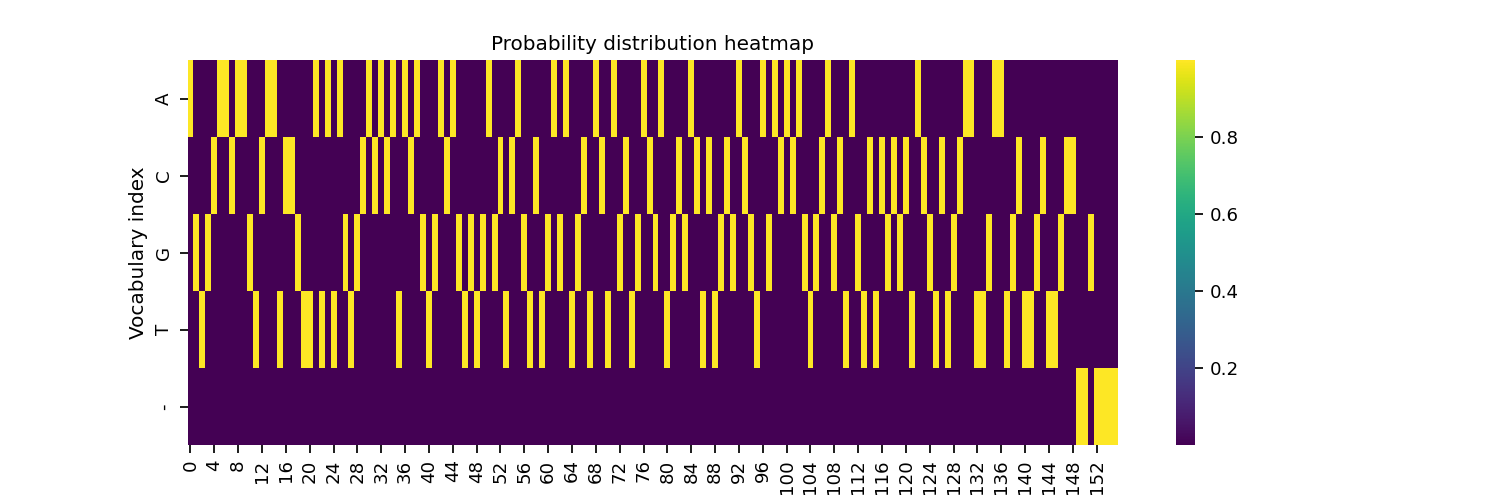



bsalign 一致性序列及其编辑距离: AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG 0
itr 一致性序列及其编辑距离: AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG 0
bmala 一致性序列及其编辑距离: AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG 0
poa 一致性序列及其编辑距离: AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCCG 0

bsalign_MSA_CNS : AGTGCAACAAGTCAATCCGTTATATAGTGCACACATACAGTGACAGTGTGAGCTCAGTCTGAGATGCTACTAGCTGACGATGCGACTCTGCGACGTAGACACAGTGCAGCTAGTCTCGCGCTACGTCTGCAATTGAATGCTTGCTTGCC--GTTT-
bsalign_QUALITY : [90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90

In [14]:
bsalign_tmp_output_dir = 'bsalign_tmp_dir'

print('Total clusters:', len(pickle_dat), '\n')

"""
sequencing_dat: 原始测序数据
consensus_dat : consensus结果
others        : 其他(可忽略)
"""
for cluster_id, (sequencing_dat, consensus_dat, others) in enumerate(pickle_dat):
    print('current_cluster_id:', cluster_id)
    for depth_id in sequencing_dat.keys():
        depth = int(depth_id[1:])
        print('current_depth:', depth)
        
        seqs  = sequencing_dat[depth_id]['seqs']
        quals = sequencing_dat[depth_id]['quals']
        ref   = sequencing_dat[depth_id]['refs']
        
        # 原始数据
        print('测序序列', '\n', os.linesep.join(seqs), '\n')
        print('测序质量分数', '\n', os.linesep.join(quals), '\n')
        print('对应的参考序列', '\n', ref, '\n')
        
        # seqformer 一致性序列及其编辑距离
        seqformer_consensus = consensus_dat[depth_id]['new_consensus']
        seqformer_distance  = consensus_dat[depth_id]['new_dis']
        
        # 编辑距离的结果也可以用 distance(ref, consensus) 函数得到
        assert seqformer_distance == distance(ref, seqformer_consensus)
        
        print('seqformer 一致性序列:', seqformer_consensus)
        print('seqformer 编辑距离:', seqformer_distance)
        print('\n')
        
        """
        Seqformer 置信度概率矩阵: shape = [T, 5], T 是多序列比对后的长度, 5 代表字符集大小 (0:A, 1:C, 2:G, 3:T, 4:-)
        
        概率矩阵转为一致性序列的方法: 首先找到概率矩阵中每个位置概率最大的字符, 然后删去 "-" 即可得到 seqformer_consensus
        """
        seqformer_consensus_probs = np.array(consensus_dat[depth_id]['consensus_probs'])
        print('置信度概率矩阵的大小:', seqformer_consensus_probs.shape)
        
        # 可视化概率矩阵
        consensus_prob_visual(seqformer_consensus_probs)
        print('\n')
        
        # 其他方法的一致性序列及其编辑距离 
        # (Note: 不清楚 bsalign 的置信度如何计算, 如果有需要可以从原始数据跑一次 bsalign 自行分析)
        bsalign_consensus   = consensus_dat[depth_id]['bs_consensus']
        bsalign_distance    = consensus_dat[depth_id]['bs_dis']
        itr_consensus       = consensus_dat[depth_id]['itr_consensus']
        itr_distance        = consensus_dat[depth_id]['itr_dis']
        bmala_consensus     = consensus_dat[depth_id]['bmala_consensus']
        bmala_distance      = consensus_dat[depth_id]['bmala_dis']
        poa_consensus       = consensus_dat[depth_id]['poa_consensus']
        poa_distance        = consensus_dat[depth_id]['poa_dis']
        print('bsalign 一致性序列及其编辑距离:', bsalign_consensus, bsalign_distance)
        print('itr 一致性序列及其编辑距离:', itr_consensus, itr_distance)
        print('bmala 一致性序列及其编辑距离:', bmala_consensus, bmala_distance)
        print('poa 一致性序列及其编辑距离:', poa_consensus, poa_distance)
        print()
        
        # 重新跑 bsalign 获取多序列比对下的一致性序列及其质量分数  
        bs_msa, bs_cns, bs_qlt = bsalign_process(seqs, bsalign_tmp_output_dir, file_idx=f"{cluster_id}_{depth_id}")
        print('bsalign_MSA_CNS :', bs_cns)
        print('bsalign_QUALITY :', bs_qlt)
        
        break 
    break


In [15]:
stat_df = {
    'method' : [],
    'dis'    : [],
    'depth'  : [],
    'cluster': [],
}

runtime_df = {
    'method': [],
    'time(s)'  : [],
    'cluster': [],
}

method_names = {
    'new': 'SeqFormer',
    'bs' : 'BSAlign',
    'poa': 'POA',
    'bmala': 'BMALA',
    'itr': 'Iterative majority',
}

for cluster_id, (batch_in, batch_out, runtimes) in enumerate(pickle_dat):
    for method, _time in runtimes.items():
        runtime_df['method'].append(method_names[method])
        runtime_df['time(s)'].append(_time)
        runtime_df['cluster'].append(cluster_id)
        
    for depth_id in batch_in.keys():
        depth = int(depth_id[1:])
        for method in [
            'new', 'poa', 'bs', 'bmala', 'itr'
        ]:
            stat_df['dis'].append(batch_out[depth_id][f'{method}_dis'])
            stat_df['depth'].append(depth)
            stat_df['method'].append(method_names[method])
            stat_df['cluster'].append(cluster_id)
            
stat_df = pd.DataFrame(stat_df)
runtime_df = pd.DataFrame(runtime_df)

In [16]:
result_df = (
    stat_df.groupby(['method', 'depth'])
      .agg(
          cluster_count=('cluster', 'nunique'),           # unique clusters
          zero_distance_count=('dis', lambda x: (x == 0).sum()),  # count of zero distance
          sum_distance=('dis', 'sum')                    # sum of distances
      )
      .reset_index()
)
result_df['success_rate'] = result_df['zero_distance_count'] / result_df['cluster_count']
result_df['mean_distance'] = result_df['sum_distance'] / result_df['cluster_count']

In [17]:
result_df

,method,depth,cluster_count,zero_distance_count,sum_distance,success_rate,mean_distance
0,BMALA,5,2410,2390,47,0.991701,0.019502
1,BMALA,6,2410,2395,36,0.993776,0.014938
2,BMALA,7,2410,2404,14,0.997510,0.005809
3,BMALA,8,2410,2406,6,0.998340,0.002490
4,BMALA,9,2410,2407,3,0.998755,0.001245
...,...,...,...,...,...,...,...
100,SeqFormer,21,2410,2409,1,0.999585,0.000415
101,SeqFormer,22,2410,2410,0,1.000000,0.000000
102,SeqFormer,23,2410,2410,0,1.000000,0.000000
103,SeqFormer,24,2410,2410,0,1.000000,0.000000


In [18]:
result_df.groupby(['method']).agg(mean_success=('success_rate', 'mean')).reset_index()

,method,mean_success
0,BMALA,0.998755
1,BSAlign,0.998498
2,Iterative majority,0.999131
3,POA,0.998656
4,SeqFormer,0.999289


<IPython.core.display.Javascript object>


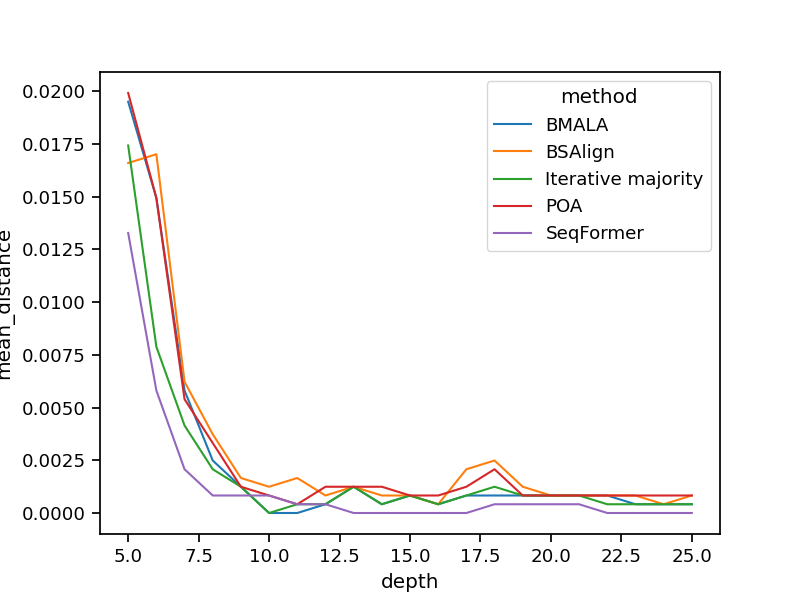

<Axes: xlabel='depth', ylabel='mean_distance'>

In [19]:
plt.figure()
sns.lineplot(data=result_df, x='depth', y='mean_distance', hue='method')

<IPython.core.display.Javascript object>


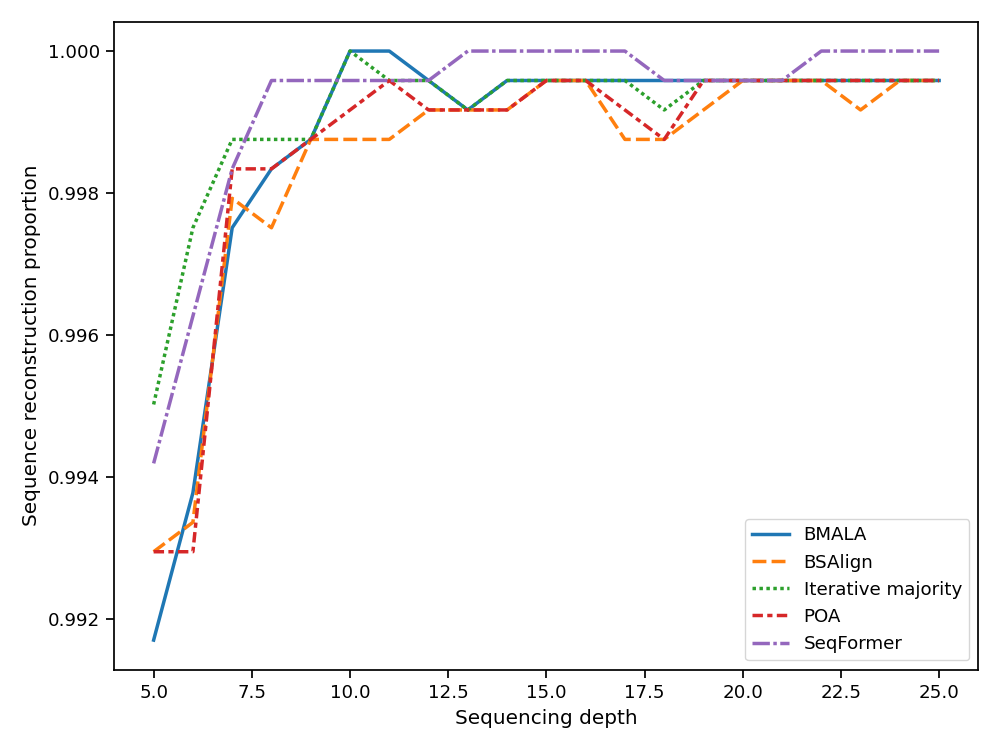

In [20]:
plt.figure(figsize=(8, 6))
sns.set_context("paper", font_scale=1.2)
sns.lineplot(data=result_df, x='depth', y='success_rate', hue='method', style="method", lw=2)
plt.legend(loc='best',)
plt.xlabel('Sequencing depth')
plt.ylabel('Sequence reconstruction proportion')
plt.tight_layout()